In [4]:
%pylab inline
from em_examples.TransientVMDCylWidget import TransientVMDCylWidget
from SimPEG import Utils, Mesh, EM
import matplotlib
matplotlib.rcParams['font.size'] = 16

Populating the interactive namespace from numpy and matplotlib


# Computing currents and data using halfpace model

In this notebook, we consider an inductive loop source located 30m above from the surface; step-off waveform is used. Halfspace earth having homogenous earth conductivity is assumed (0.02 S/m). With this setup, we first calcuates currents at different time channels then generates both bz and dbz/dt at the receiver location. Generated images will be saved in the directory (`figdir`).

In [15]:
figdir = "../images/halfspace/"

In [16]:
vmd = TransientVMDCylWidget()
h1 = 0
h2 = 0
Sigma0 = 1e-8
Sigma1 = 0.02
Sigma2 = 0.02
Sigma3 = 0.02
z = 30.
radius = 13.
rxOffset = 0.
time = np.logspace(-5, -2, 31)
bType = "bSecondary"
vmd.genMesh(cs=10., ncx=15, ncz=60, npad=20)
vmd.getCoreDomain(xmax=400, zmin=-400, zmax=400.)
m = vmd.setThreeLayerParam(h1=h1, h2=h2, sig0=Sigma0, sig1=Sigma1, sig2=Sigma2, sig3=Sigma3)
sigma = vmd.mapping*m
# sphereind = Utils.ModelBuilder.getIndicesSphere(np.r_[0., 0., -60], 25, vmd.mesh.gridCC)
# sigma[sphereind] = 5e0
sigma2D = vmd.mirrorArray(sigma[vmd.activeCC], direction="z")
sigma2D_nan = Utils.mkvc(sigma2D)
sigma2D_nan[vmd.mesh2D.gridCC[:, 1]>0.] = np.nan
srcLoc = np.array([0., 0., z])
rxLoc = np.array([[rxOffset, 0., z]])


dbzdt = EM.TDEM.Rx.Point_dbdt(rxLoc, time, orientation='z')
bz = EM.TDEM.Rx.Point_b(rxLoc, time, orientation='z')
src = EM.TDEM.Src.CircularLoop([bz, dbzdt],
                               waveform=EM.TDEM.Src.StepOffWaveform(),
                               loc=srcLoc, radius=radius)
vmd.srcList = [src]
prb = EM.TDEM.Problem3D_b(vmd.mesh, sigma=sigma)
prb.timeSteps = [(1e-06, 10), (5e-06, 10), (1e-05, 10), (5e-5, 10), (1e-4, 10), (5e-4, 10), (1e-3, 10)]
survey = EM.TDEM.Survey(vmd.srcList)
prb.pair(survey)
vmd.f = prb.fields(sigma)
vmd.prb = prb
vmd.srcLoc = srcLoc
vmd.rxLoc = rxLoc

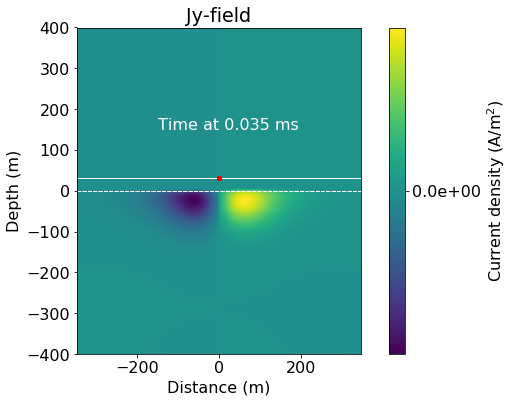

In [17]:
itime = 15
vmd.getFields(itime)
vmd.plotField(Field='J', view="y", itime=itime)

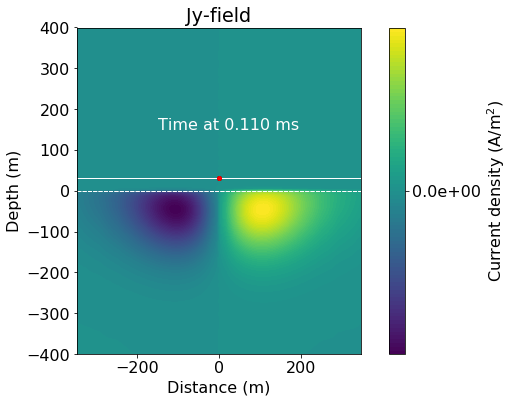

In [18]:
itime = 25
vmd.getFields(itime)
vmd.plotField(Field='J', view="y", itime=itime)

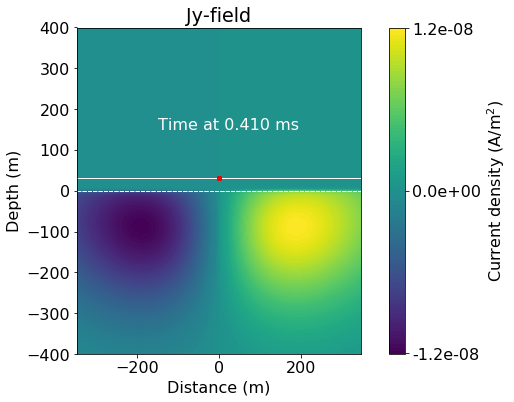

In [19]:
itime = 35
vmd.getFields(itime)
vmd.plotField(Field='J', view="y", itime=itime)

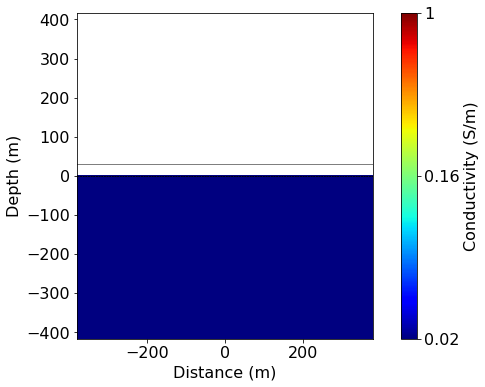

In [20]:
xmax = 400.
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
vmin, vmax = np.log10(0.02), np.log10(1.)
out = vmd.mesh2D.plotImage(np.log10(sigma2D_nan), ax=ax, clim=(vmin, vmax), pcolorOpts={"cmap":"jet"})
cb = plt.colorbar(out[0], ax=ax, ticks=np.linspace(vmin, vmax, 3), format="$10^{%.1f}$")
cb.set_label("Conductivity (S/m)")
cb.set_ticklabels(["0.02", "0.16", "1"])
ax.plot(np.r_[-xmax, xmax], np.ones(2)*vmd.srcLoc[2], 'k-', lw=0.5)
ax.plot(np.r_[-xmax, xmax], np.ones(2)*vmd.z0, 'k--', lw=0.5)
ax.plot(np.r_[-xmax, xmax], np.ones(2)*vmd.z1, 'k--', lw=0.5)
ax.plot(np.r_[-xmax, xmax], np.ones(2)*vmd.z2, 'k--', lw=0.5)
# ax.plot(0, vmd.srcLoc[2], 'ko', ms=4)
# ax.plot(vmd.rxLoc[0, 0], vmd.srcLoc[2], 'ro', ms=4)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Depth (m)")
plt.gca().set_aspect('equal', adjustable='box')

In [21]:
def get_data(Sigma1, Sigma2, Sigma3):
    vmd = TransientVMDCylWidget()
    h1 = 200
    h2 = 50
    Sigma0 = 1e-8
    z = 20.
    radius = 13.
    rxOffset = 0.
    time = np.logspace(-5, -2, 31)
    bType = "bSecondary"
    vmd.genMesh(cs=10., ncx=15, ncz=60, npad=20)
    vmd.getCoreDomain(xmax=400, zmin=-400, zmax=400.)
    m = vmd.setThreeLayerParam(h1=h1, h2=h2, sig0=Sigma0, sig1=Sigma1, sig2=Sigma2, sig3=Sigma3)
    sigma = vmd.mapping*m
    # sphereind = Utils.ModelBuilder.getIndicesSphere(np.r_[0., 0., -60], 25, vmd.mesh.gridCC)
    # sigma[sphereind] = 5e0
    sigma2D = vmd.mirrorArray(sigma[vmd.activeCC], direction="z")
    sigma2D_nan = Utils.mkvc(sigma2D)
    sigma2D_nan[vmd.mesh2D.gridCC[:, 1]>0.] = np.nan
    srcLoc = np.array([0., 0., z])
    rxLoc = np.array([[rxOffset, 0., z]])


    dbzdt = EM.TDEM.Rx.Point_dbdt(rxLoc, time, orientation='z')
    bz = EM.TDEM.Rx.Point_b(rxLoc, time, orientation='z')
    src = EM.TDEM.Src.CircularLoop([bz, dbzdt],
                                   waveform=EM.TDEM.Src.StepOffWaveform(),
                                   loc=srcLoc, radius=radius)

    vmd.srcList = [src]
    prb = EM.TDEM.Problem3D_b(vmd.mesh, sigma=sigma)
    prb.timeSteps = [(1e-06, 10), (5e-06, 10), (1e-05, 10), (5e-5, 10), (1e-4, 10), (5e-4, 10), (1e-3, 10)]
    survey = EM.TDEM.Survey(vmd.srcList)    
    prb.pair(survey)
    return survey.dpred(sigma)

In [22]:
data_half = get_data(0.01, 0.01, 0.01)

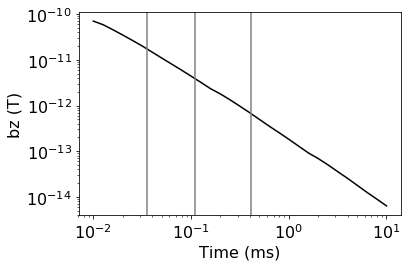

In [23]:
tind = [15, 25, 35]
fig = plt.figure()
plt.loglog(time*1e3, data_half[:31], 'k')
plt.xlabel("Time (ms)")
# plt.grid(which='both')
plt.ylabel("bz (T)")
ylim = plt.ylim()
for i in tind:
    plt.plot(np.ones(2)*prb.times[i]*1e3, ylim, color='grey')
plt.ylim(ylim)
plt.tight_layout()
fig.savefig(figdir+'decay_dbdt', dpi=200)

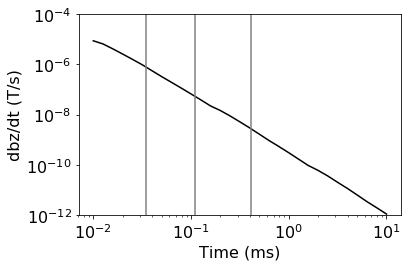

In [24]:
tind = [15, 25, 35]
fig = plt.figure()
plt.loglog(time*1e3, -data_half[31:], 'k')
plt.xlabel("Time (ms)")
# plt.grid(which='both')
plt.ylabel("dbz/dt (T/s)")
for i in tind:
    plt.plot(np.ones(2)*prb.times[i]*1e3, [1e-12, 1e-4], color='grey')
plt.ylim(1e-12, 1e-4)  
plt.tight_layout()
fig.savefig(figdir+'decay_b', dpi=200)